In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import make_interp_spline as make_spline
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


scaled_disorder = 1

base_dir = "../results/"

print(base_dir[2:])

/Users/rafal.swietek/Projects/CODES/QHamSolver/QSunU1/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


[0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
7 5000.0
9 4000.0
11 4000.0
13 4799.0
15 251.0
7 5000.0
9 4000.0
11 4000.0
13 4799.0
15 251.0
7 5000.0
9 4000.0
11 4000.0
13 4799.0
15 251.0


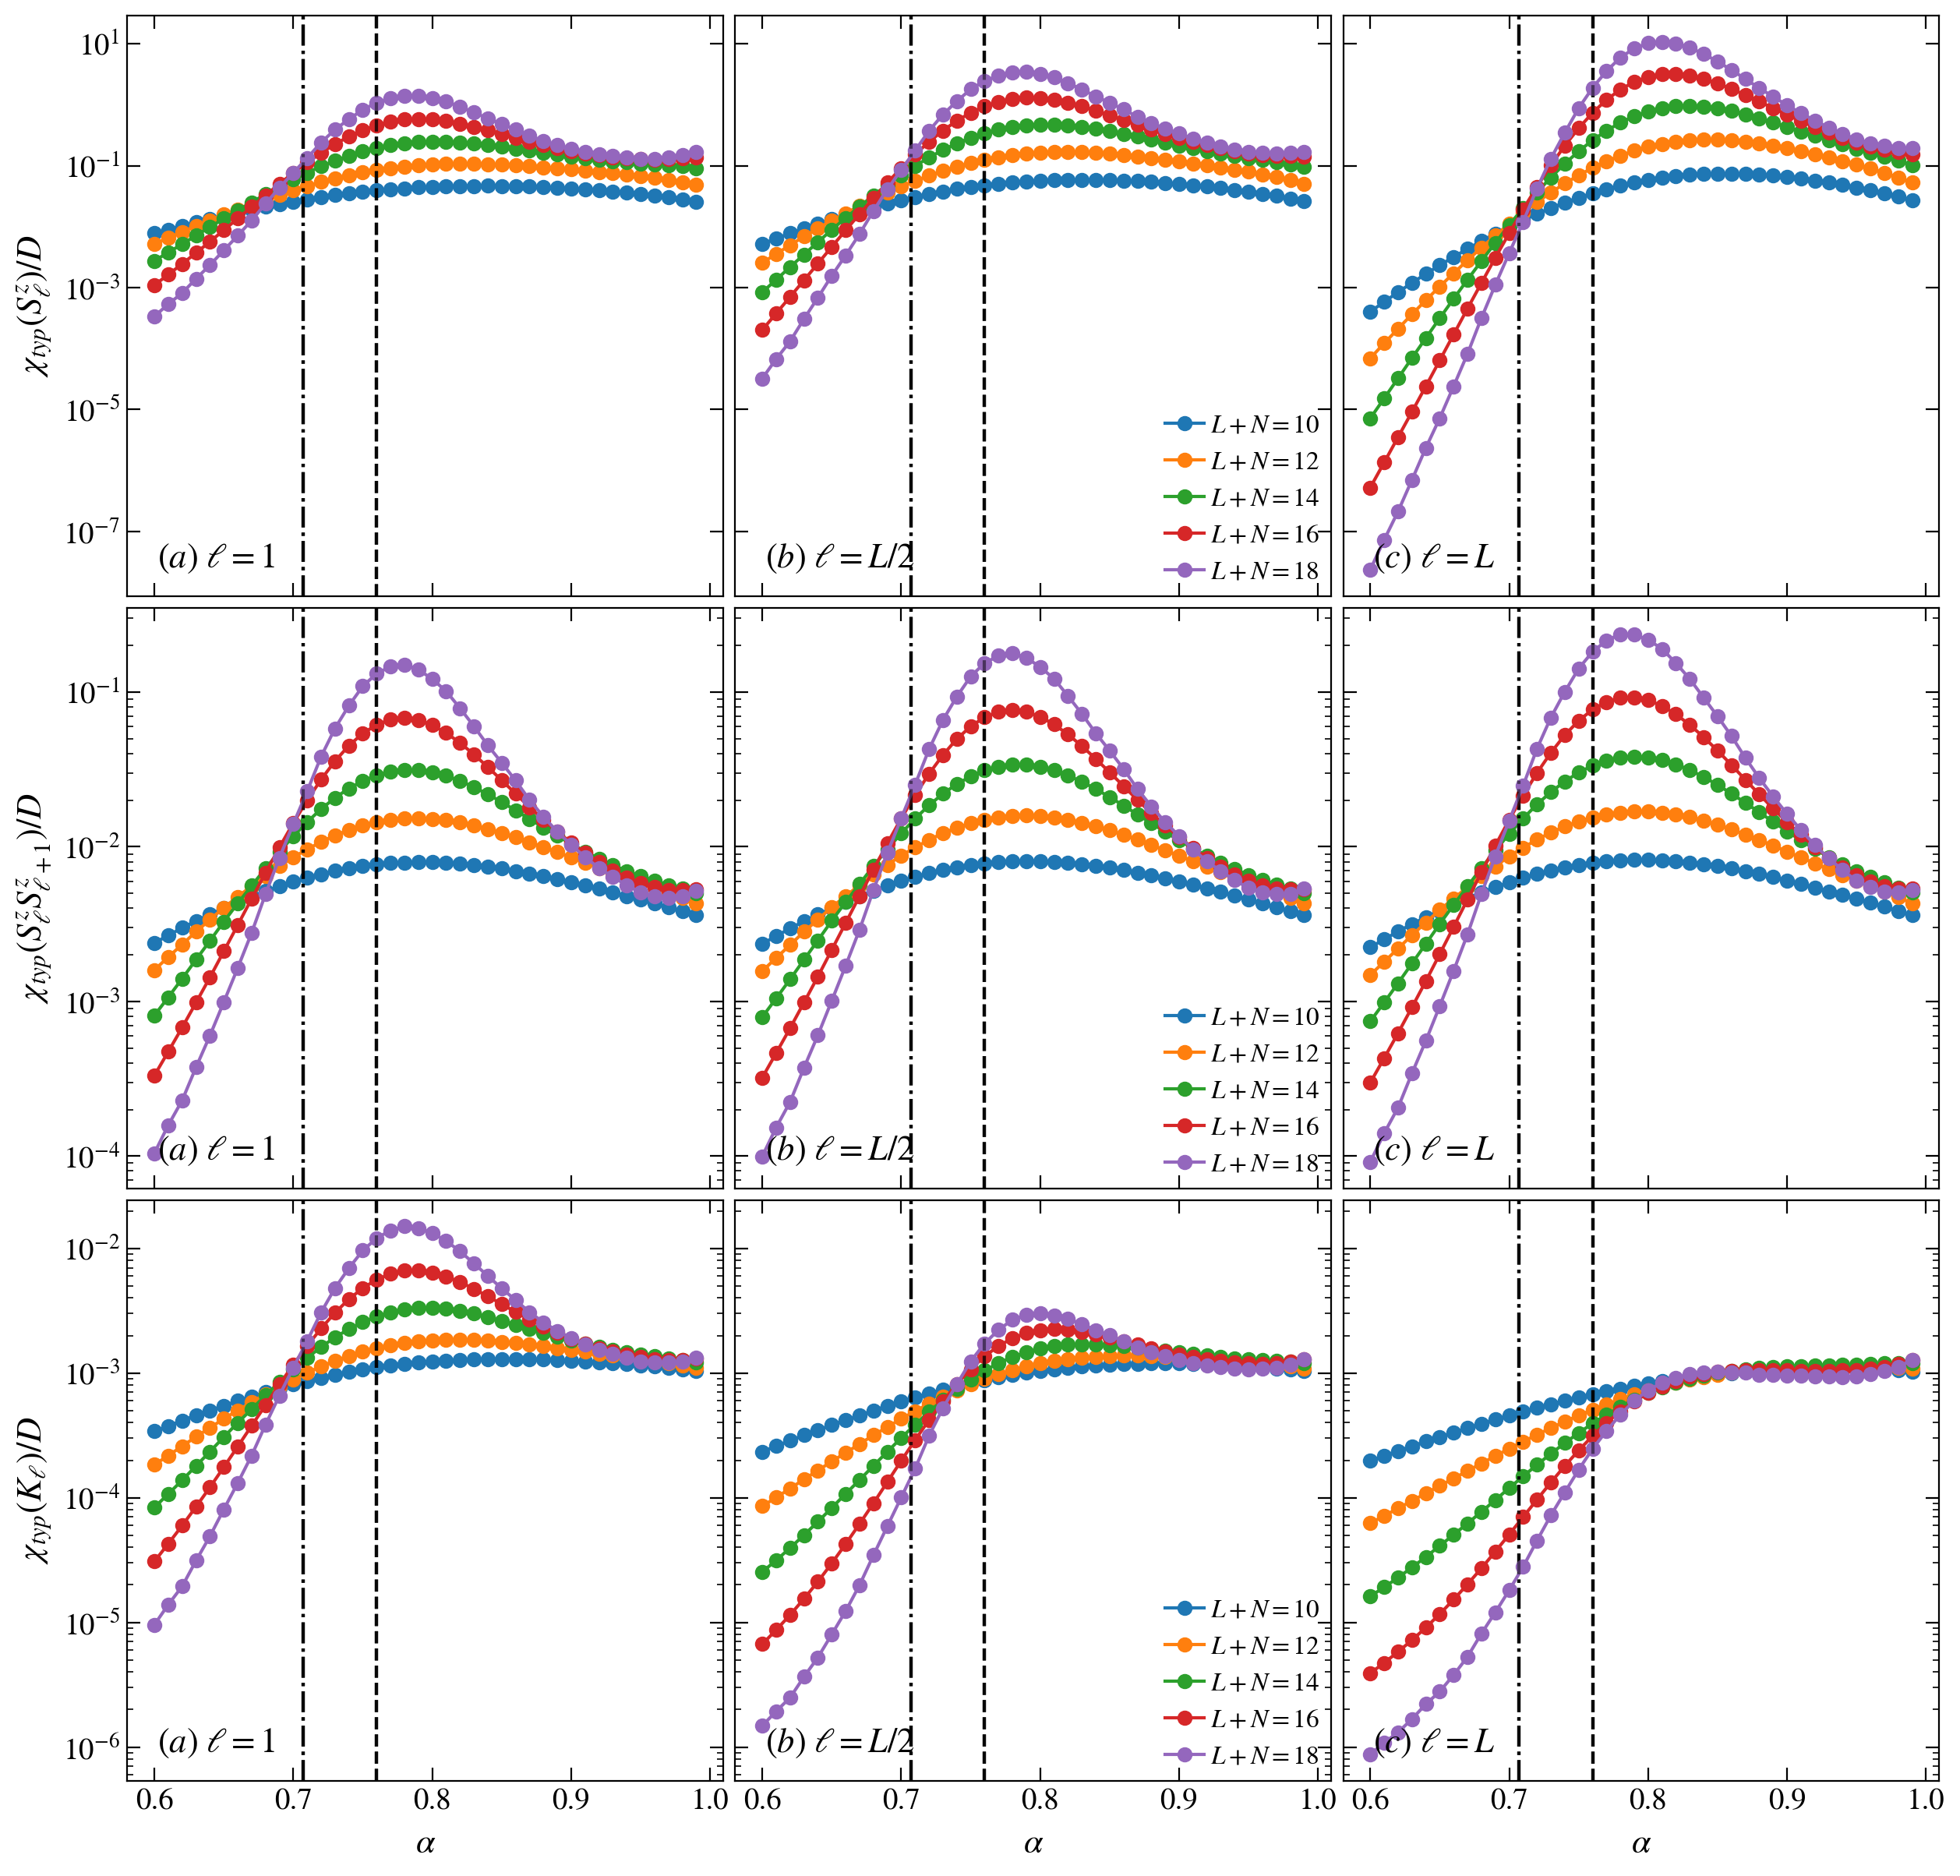

In [41]:
L_total=15

J=1
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
Sz=0
L = L_total - N


# w_vals = np.unique( np.round( np.array( [ *np.linspace(0.4, 1.3, 19), *np.linspace(0.7, 0.82, 13)] ), 3) )
alfa_vals = np.arange(0.6, 1., 0.01)
print(alfa_vals)


sizes = np.arange(10, 19, 2)

xlab = r"$\alpha$"

fig, axes = plt.subplots( nrows=3, ncols=3, figsize=(15,15), dpi = 200, sharex=True, sharey='row')
ylab_in = ['S^z_\ell', 'S^z_\ell S^z_{\ell+1}', 'K_\ell']
for iii, operator_name in enumerate(['Sz', 'SzSz', 'kin']):
    p=0
    axis = [axes[iii][0], axes[iii][1], axes[iii][2]]
    if iii > 1: p=1
    for L_total in sizes:
        dim = 2**L_total
        L = L_total - N
        sites    = np.zeros((3));    sites.fill(np.nan)
        agp      = np.zeros((alfa_vals.size, 3));    agp.fill(np.nan)
        typ_susc = np.zeros((alfa_vals.size, 3));    typ_susc.fill(np.nan)
        _var     = np.zeros((alfa_vals.size, 3));        _var.fill(np.nan)
        wH       = np.zeros((alfa_vals.size));                 wH.fill(np.nan)
        realisations = np.zeros((alfa_vals.size));             realisations.fill(np.nan)
        # susc = np.zeros((L_total));    sites.fill(np.nan)
        _exist = 0
        _first_wH = -1
        _last_wH = -1
        for ii, alfa in enumerate(alfa_vals):
            name = base_dir + 'MatrixElements/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', Sz=Sz)
            if exists(name):
                with h5py.File(name, "r") as file:
                    sites        = np.array(file.get('sites')).astype(int)
                    agp[ii]      = np.array(file.get('AGP/' + operator_name))
                    # print('AGP/' + name)
                    typ_susc[ii] = np.array(file.get('TYP_SUSC/' + operator_name))
                    mat_elem = np.transpose(np.array(file.get('DIAG_MAT/' + operator_name)))
                    _var[ii]     = np.array([np.var(aa) for aa in mat_elem])
                    realisations[ii] = np.array(file.get('realisations'))
                    _exist = 1
            else:
                print(name)
            
        if _exist:                
            print(L, min(realisations) )

            agp = np.transpose(agp)
            _var = np.transpose(_var)
            typ_susc = np.transpose(typ_susc)
            
            for ii in range(len(sites)):
                # axis[ii].plot(w_vals, agp[idx] / dim, marker='o', label=r"$L+N=%d$"%L_total)
                axis[ii].plot(alfa_vals, typ_susc[ii] / dim, marker='o', label=r"$L+N=%d$"%L_total)
                # print(_var(idx))
                # axis[ii].plot(w_vals, np.sqrt(_var[idx] * dim), marker='o', label=r"$L+N=%d$"%L_total)
        
        for ax in axis:
            ax.axvline(x=0.76, ls='--', c='k', alpha=0.5)
            ax.axvline(x=1/np.sqrt(2), ls='-.', c='k', alpha=0.5)
    # ylab = r"$D(\omega_H)^2\chi(S^z_\ell)/L_{tot}$"
    ylab = r"$\chi_{typ}(%s)/D$"%ylab_in[iii]
    # ylab = r"$\sigma(%s)D$"%ylab_in[iii]
    # ylab = r"$||%s)||^2/D$"%ylab_in[iii]
    fig_help.set_plot_elements(axis[0], ylabel=ylab, xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='linear')
    fig_help.set_plot_elements(axis[1], ylabel="",   xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='linear')
    fig_help.set_plot_elements(axis[2], ylabel="",   xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='linear')
    fig_help.set_legend(axis[1], loc = 'lower right', fontsize=12)#, anchor=(-0.02, 0.35))

    axis[0].annotate(r"$(a)\ \ell=1$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    axis[1].annotate(r"$(b)\ \ell=L/2$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    axis[2].annotate(r"$(c)\ \ell=L$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig.subplots_adjust(wspace = 0.02, hspace=0.02)

# plt.savefig("plots/Fig_mat_elem.pdf", bbox_inches = 'tight', pad_inches=0.02)
# plt.savefig("plots/Fig_mat_elem.png", bbox_inches = 'tight', pad_inches=0.02)

[0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
7 5000.0 0.0009765625
9 4000.0 0.000244140625
11 4000.0 6.103515625e-05
13 4799.0 1.52587890625e-05
15 251.0 3.814697265625e-06


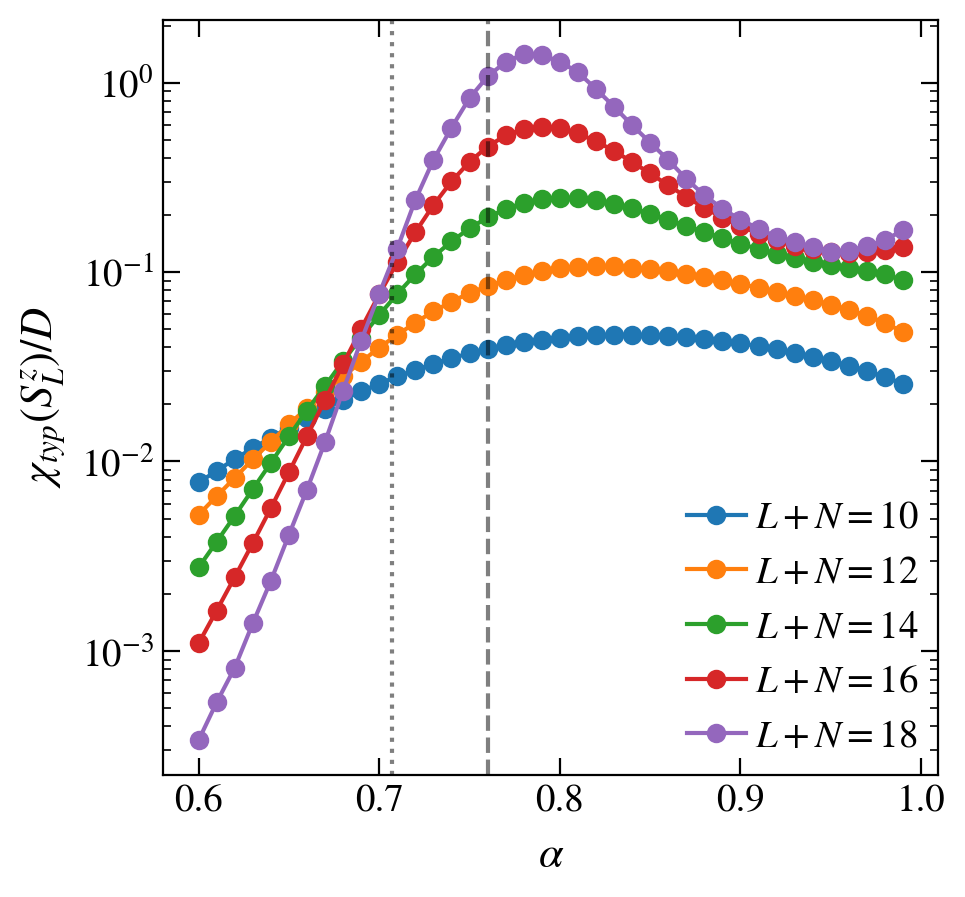

In [40]:
L_total=15

J=1
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
Sz=0
L = L_total - N

scaled_disorder = 1

# w_vals = np.unique( np.round( np.array( [ *np.linspace(0.4, 1.3, 19), *np.linspace(0.7, 0.82, 13)] ), 3) )
alfa_vals = np.arange(0.6, 1., 0.01)
print(alfa_vals)

sizes = np.arange(10, 19, 2)

xlab = r"$\alpha$"

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True, sharey='row')
ylab_in = ['S^z_\ell']
for iii, operator_name in enumerate(['Sz']):
    p=0
    for L_total in sizes:
        dim = 2**L_total
        L = L_total - N
        sites    = np.zeros((3));    sites.fill(np.nan)
        agp      = np.zeros((alfa_vals.size, 3));    agp.fill(np.nan)
        typ_susc = np.zeros((alfa_vals.size, 3));    typ_susc.fill(np.nan)
        _var     = np.zeros((alfa_vals.size, 3));    _var.fill(np.nan)
        wH       = np.zeros((alfa_vals.size));       wH.fill(np.nan)
        realisations = np.zeros((alfa_vals.size));   realisations.fill(np.nan)
        # susc = np.zeros((L_total));    sites.fill(np.nan)
        _exist = 0
        _first_wH = -1
        _last_wH = -1
        for ii, alfa in enumerate(alfa_vals):
            name = base_dir + 'MatrixElements/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', Sz=Sz)
            if exists(name):
                with h5py.File(name, "r") as file:
                    sites        = np.array(file.get('sites')).astype(int)
                    agp[ii]      = np.array(file.get('AGP/' + operator_name))
                    # print('AGP/' + name)
                    typ_susc[ii] = np.array(file.get('TYP_SUSC/' + operator_name))
                    mat_elem = np.transpose(np.array(file.get('DIAG_MAT/' + operator_name)))
                    _var[ii]     = np.array([np.var(aa) for aa in mat_elem])
                    realisations[ii] = np.array(file.get('realisations'))
                    _exist = 1
            else:
                print(name)
            
        
        wH = 1/dim#np.sqrt(2**(N-1) * 0.3 + J**2 / 4 * ( (alfa_vals**(2*L+2) - alfa_vals**2) / (alfa_vals**2 - 1) ) + L / 4 * (1 + (w)**2 / 3)) / (0.3413 * dim)
        if _exist:                
            print(L, min(realisations) , wH)

            agp = np.transpose(agp)
            _var = np.transpose(_var)
            typ_susc = np.transpose(typ_susc)
        
            idx = 0
            # axis.plot(w_vals, agp[idx] / dim, marker='o', label=r"$L+N=%d$"%L_total)
            axis.plot(alfa_vals, typ_susc[idx] * dim * wH**2, marker='o', label=r"$L+N=%d$"%L_total)
            # print(_var(idx))
            # axis[ii].plot(w_vals, np.sqrt(_var[idx] * dim), marker='o', label=r"$L+N=%d$"%L_total)

    axis.axvline(x=0.76, ls='--', c='k', alpha=0.5)
    # axis.axvline(x=0.77, ls='-.', c='k', alpha=0.5)
    axis.axvline(x=1/np.sqrt(2), ls=':', c='k', alpha=0.5)
    # ylab = r"$D(\omega_H)^2\chi(S^z_\ell)/L_{tot}$"
    # ylab = r"$\chi_{typ}(%s)/D$"%ylab_in[iii]
    ylab = r"$\chi_{typ}(S^z_L)/ D$"
    # ylab = r"$\sigma(%s)D$"%ylab_in[iii]
    # ylab = r"$||S^z_\ell)||^2/D$"
    fig_help.set_plot_elements(axis, ylabel=ylab, xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='linear')
    # fig_help.set_plot_elements(axis[1], ylabel="",   xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='linear')
    # fig_help.set_plot_elements(axis[2], ylabel="",   xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='linear')
    fig_help.set_legend(axis, loc = 'lower right', fontsize=14, ncol=1)#, anchor=(-0.02, 0.35))

    # axis[0].annotate(r"$(a)\ \ell=1$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    # axis[1].annotate(r"$(b)\ \ell=L/2$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    # axis[2].annotate(r"$(c)\ \ell=L$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig.subplots_adjust(wspace = 0.02, hspace=0.02)

# plt.savefig("plots/Fig4.pdf", bbox_inches = 'tight', pad_inches=0.02)
# plt.savefig("plots/Fig4.png", bbox_inches = 'tight', pad_inches=0.02)

[0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


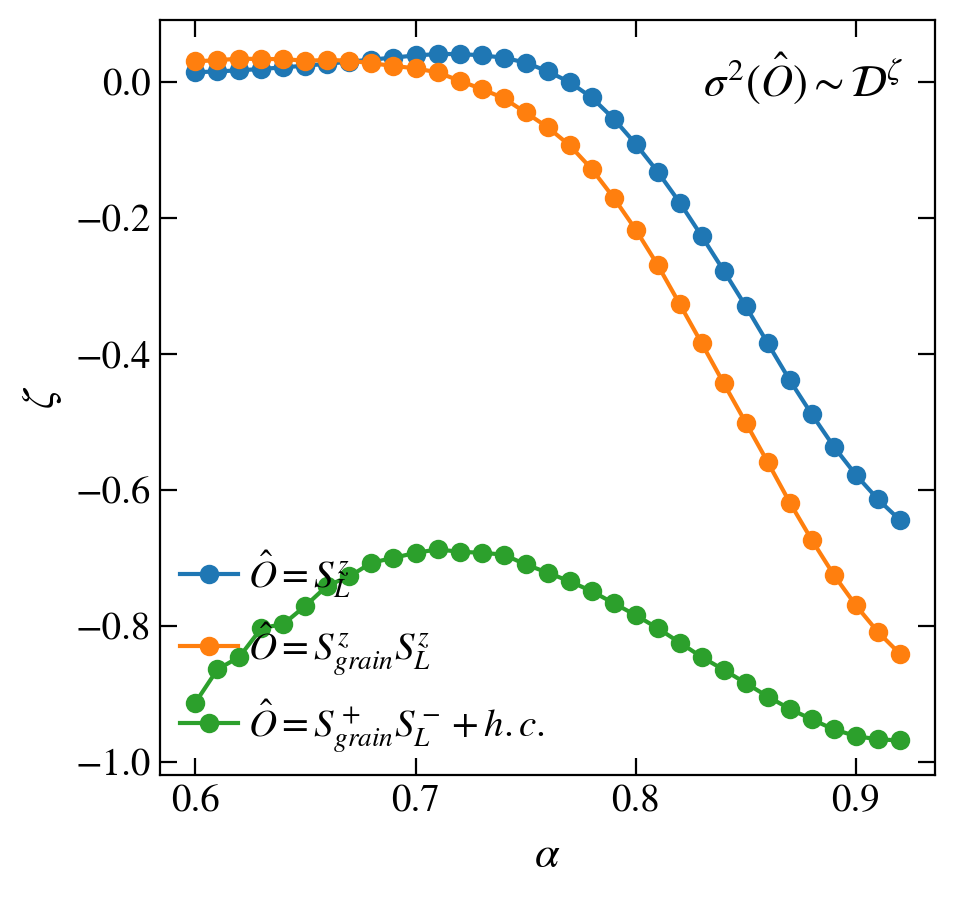

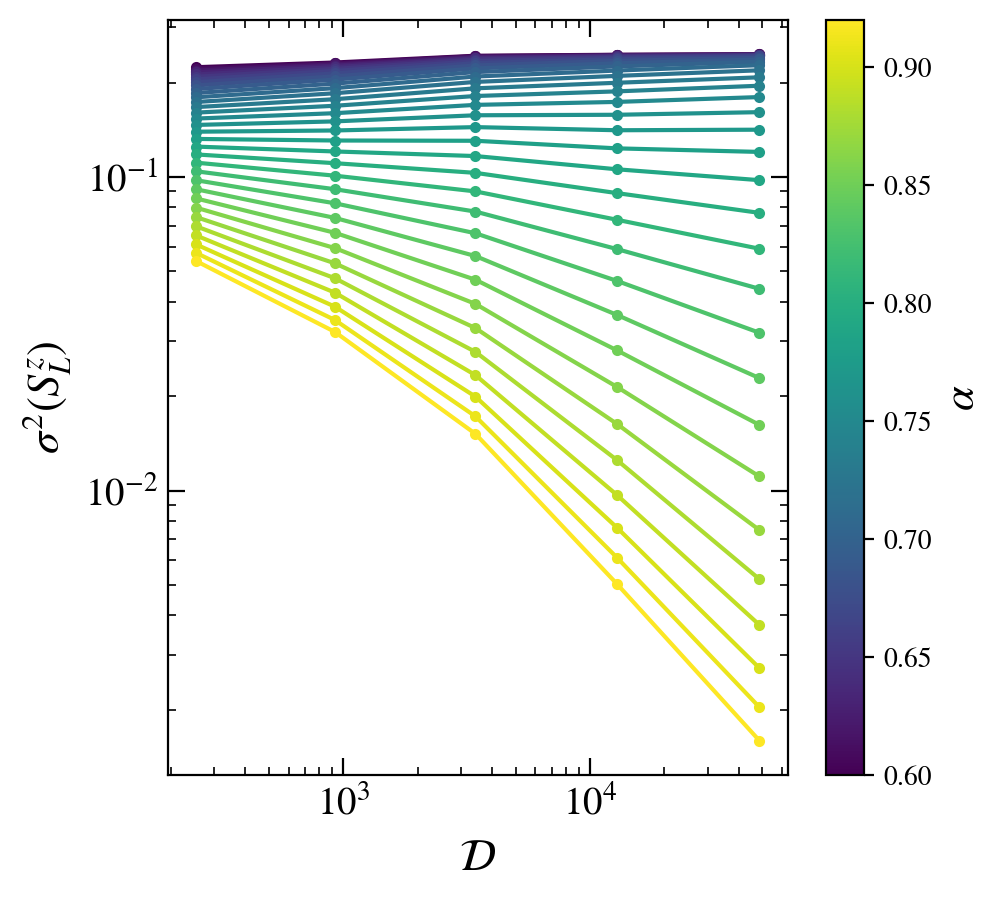

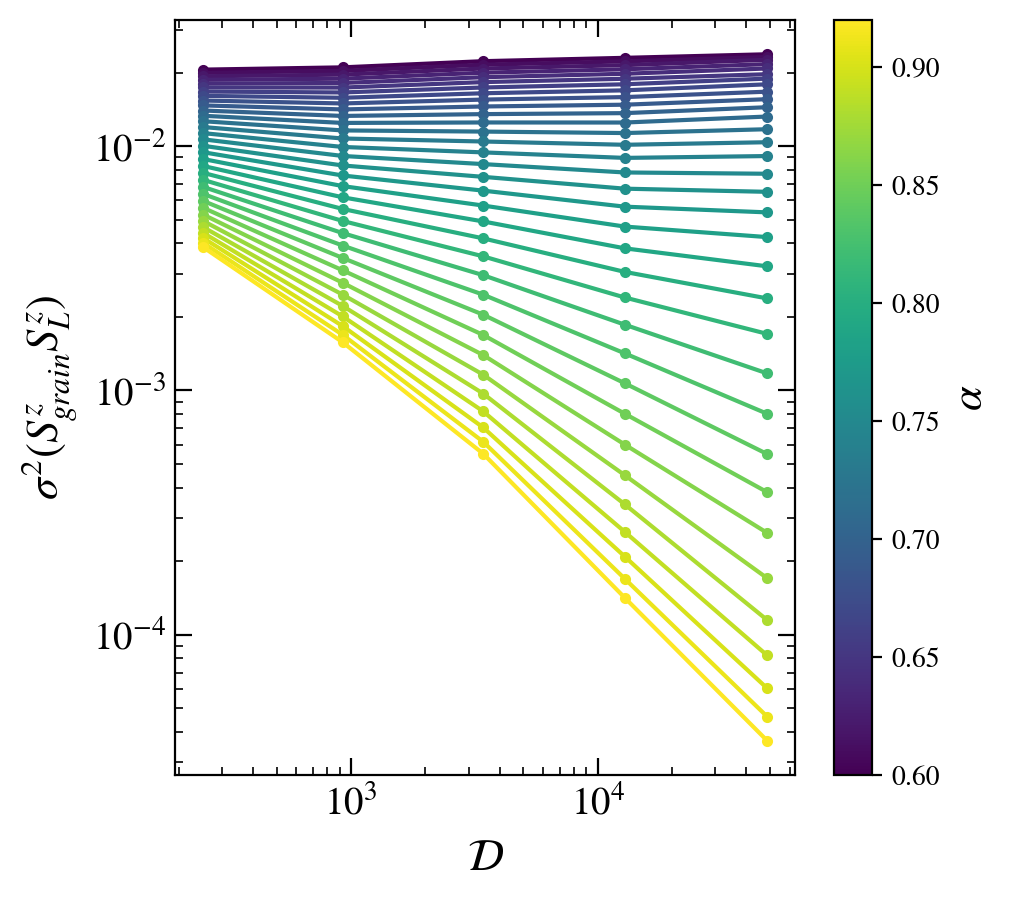

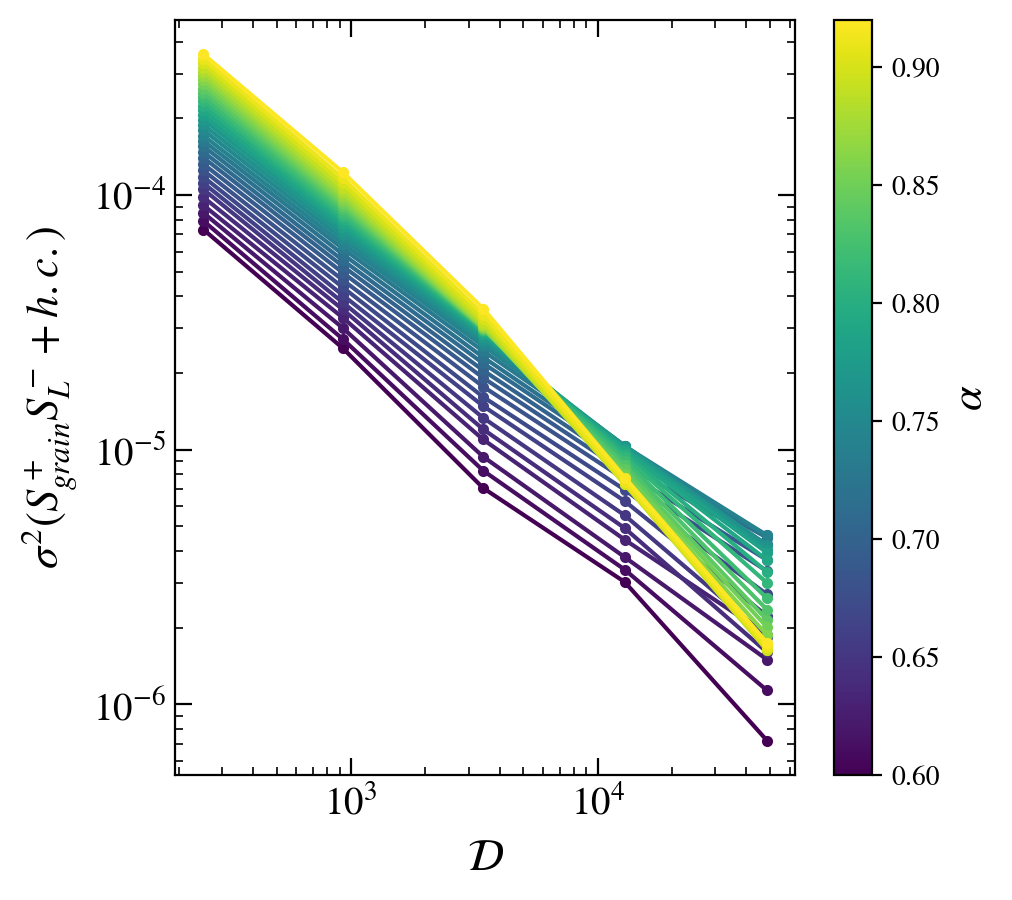

In [38]:
L_total=15

J=1
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
L = L_total - N

Sz = 0
alfa_crit=0.75

# w_vals = np.unique( np.round( np.array( [ *np.linspace(0.4, 1.3, 19), *np.linspace(0.7, 0.82, 13)] ), 3) )
alfa_vals = np.arange(0.6, 0.92, 0.01)
print(alfa_vals)

sizes = np.arange(10, 19, 2)

xlab = r"$\mathcal{D}$"
norm = matplotlib.colors.Normalize(
        vmin=np.min(alfa_vals),
        vmax=np.max(alfa_vals))

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True, sharey='row')
ylab_in = ['S^z_L', 'S^z_{grain} S^z_{L}', 'S^+_{grain} S^-_{L} + h.c.']
for iii, operator_name in enumerate(['Sz', 'SzSz', 'kin']):
    p = 0 if iii < 2 else 1
    fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True, sharey='row')

    exponent = np.zeros(alfa_vals.shape)
    for ii_a, alfa in enumerate(alfa_vals):
        agp      = np.zeros((sizes.size));    agp.fill(np.nan)
        typ_susc = np.zeros((sizes.size));    typ_susc.fill(np.nan)
        _var     = np.zeros((sizes.size));    _var.fill(np.nan)
        # realisations = np.zeros((sizes.size)); realisations.fill(np.nan)
        
        for ii, L_total in enumerate(sizes):
            dim = 2**L_total
            L = L_total - N
            name = base_dir + 'MatrixElements/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', Sz=Sz)
            if exists(name):
                with h5py.File(name, "r") as file:
                    agp[ii]      = np.array(file.get('AGP/' + operator_name))[-1]
                    typ_susc[ii] = np.array(file.get('TYP_SUSC/' + operator_name))[-1]
                    mat_elem = np.array(file.get('DIAG_MAT/' + operator_name))
                    _var[ii]     = mat_elem[3, -1]
                    nuus = np.array(file.get('DIAG_MAT/nuss'))
                    # print(nuus)
                    
            else:
                print(name)
        col = 'red' if alfa == alfa_crit else s_m.to_rgba(alfa)

        dims = binom(sizes, sizes//2)
        # axis.plot(dims, typ_susc / dims, marker='o', color=col)
        axis.plot(dims, (_var), marker='o', markersize=3, color=col)

        pars, pconv = fit(power_law,
                    xdata = dims[-4:],
                    ydata = _var[-4:])
        # print(operator_name, np.round(w,2), pars[0])
        exponent[ii_a] = pars[0]


    ax.plot(alfa_vals, exponent, marker='o', label=r"$\hat{O}=%s$"%ylab_in[iii])
    # ylab = r"$D(\omega_H)^2\chi(S^z_\ell)/L_{tot}$"
    # ylab = r"$\chi_{typ}(%s)/D$"%ylab_in[iii]
    # ylab = r"$\chi_{typ}/D$"
    ylab = r"$\sigma^2(%s)$"%ylab_in[iii]
    fig_help.set_plot_elements(axis, ylabel=ylab, xlabel=xlab, font_size=14, set_legend=False, yscale='log', xscale='log')
    fig_help.set_legend(axis, loc = 'lower left', fontsize=14, ncol=2)#, anchor=(-0.02, 0.35))

    # axis.plot(dims, 1e-2 / (dims/1e3)**0.5, ls='--', c='k')
    # axis.plot(dims, 1e-2 / (dims/1e3)**0.75, ls=':', c='k')
    cbar = fig.colorbar(s_m)#, ax=a, location='top', fraction = 0.6)
    cbar.set_label(r"$\alpha$", fontsize=16)

    # axis[0].annotate(r"$(a)\ \ell=1$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    # axis[1].annotate(r"$(b)\ \ell=L/2$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    # axis[2].annotate(r"$(c)\ \ell=L$", fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig.subplots_adjust(wspace = 0.02, hspace=0.02)
ax.annotate(r"$\sigma^2(\hat{O})\sim\mathcal{D}^{\zeta}$", fontsize=16, xy=(0.7, 0.9), xycoords='axes fraction')
fig_help.set_plot_elements(ax, ylabel=r"$\zeta$", xlabel=r"$\alpha$", font_size=14, set_legend=False, yscale='linear', xscale='linear')
fig_help.set_legend(ax, loc = 'lower left', fontsize=14, ncol=1)#, anchor=(-0.02, 0.35))
# plt.savefig("plots/Fig4.pdf", bbox_inches = 'tight', pad_inches=0.02)
# plt.savefig("plots/Fig4.png", bbox_inches = 'tight', pad_inches=0.02)

[0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92]


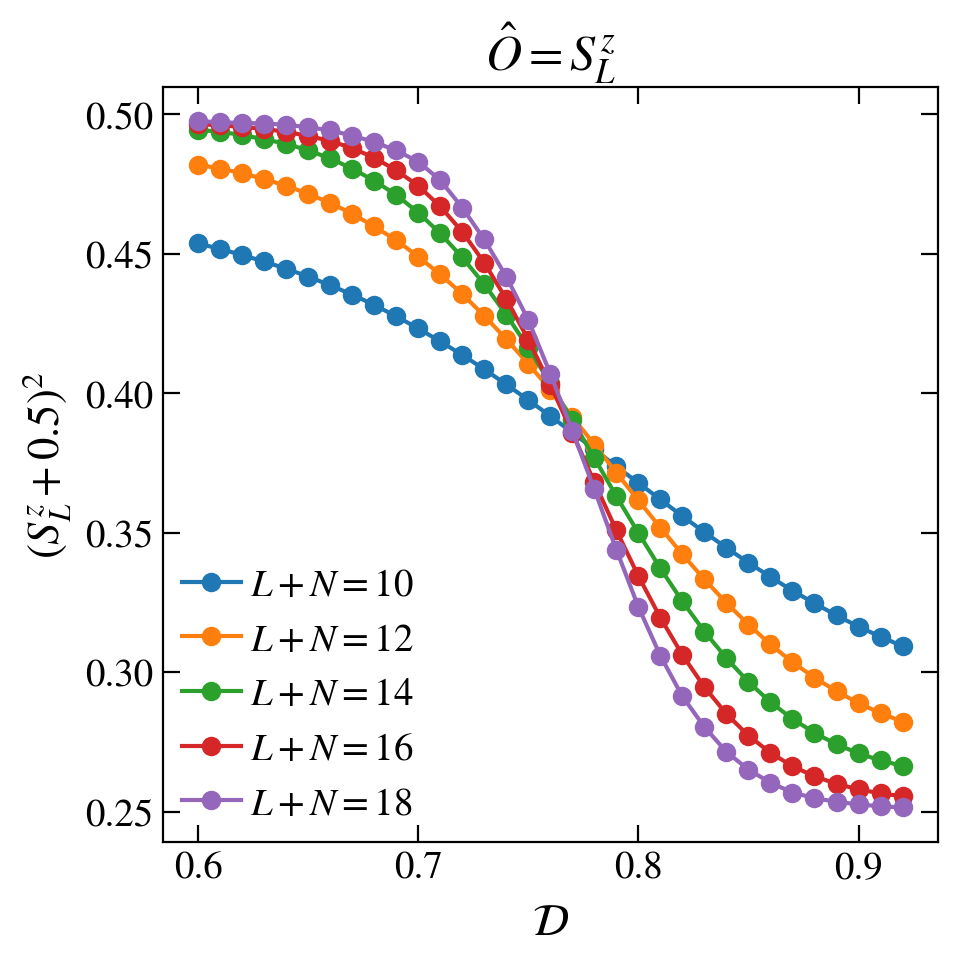

In [33]:
L_total=15

J=1
alfa=1.0
h=1.0
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
L = L_total - N

Sz = 0
alfa_crit=0.75

# w_vals = np.unique( np.round( np.array( [ *np.linspace(0.4, 1.3, 19), *np.linspace(0.7, 0.82, 13)] ), 3) )
alfa_vals = np.arange(0.6, 0.92, 0.01)
print(alfa_vals)

sizes = np.arange(10, 19, 2)

xlab = r"$\mathcal{D}$"
norm = matplotlib.colors.Normalize(
        vmin=np.min(alfa_vals),
        vmax=np.max(alfa_vals))

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

ylab_in = ['S^z_L', 'S^z_{grain} S^z_{L}', 'S^+_{grain} S^-_{L} + h.c.']
# for iii, operator_name in enumerate(['Sz', 'SzSz', 'kin']):
for iii, operator_name in enumerate(['Sz']):
    p = 0 if iii < 2 else 1
    fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

    exponent = np.zeros(alfa_vals.shape)
    for ii, L_total in enumerate(sizes):
        L = L_total - N
        name_out = "Sz_var_last_spin_nu=0.1_L=%g,N=%g.hdf5"%(L, N)
        hf = h5py.File(name_out, 'w')
        hf.create_dataset('interaction', alfa_vals.shape, data = alfa_vals)

        dim = 2**L_total
        occup_dist = np.zeros((alfa_vals.size));    occup_dist.fill(np.nan)
        for ii_a, alfa in enumerate(alfa_vals):
        # realisations = np.zeros((sizes.size)); realisations.fill(np.nan)
        
            name = base_dir + 'MatrixElements/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', Sz=Sz)
            if exists(name):
                with h5py.File(name, "r") as file:
                    occup_dist[ii_a] = np.array(file.get('OCC/' + operator_name))[0, -1]
                    nuus = np.array(file.get('DIAG_MAT/nuss'))
                    # print(mat_elem.shape)   
            else:
                print(name)
       


        axis.plot(alfa_vals, occup_dist, marker='o', label=r"$L+N=%d$"%L_total)
        axis.set_title(r"$\hat{O}=%s$"%ylab_in[iii], fontsize=18)

        hf.create_dataset('occupation distance', occup_dist.shape, data = occup_dist)
        hf.close()

    ylab = r"$(%s+0.5)^2$"%ylab_in[iii]
    fig_help.set_plot_elements(axis, ylabel=ylab, xlabel=xlab, font_size=14, set_legend=False, yscale='linear', xscale='linear')
    fig_help.set_legend(axis, loc = 'lower left', fontsize=14, ncol=1)#, anchor=(-0.02, 0.35))


NUm of bins 5
0.38537831120893457


Text(0.5, 0.7, '$\\nu\\approx-0.05$')

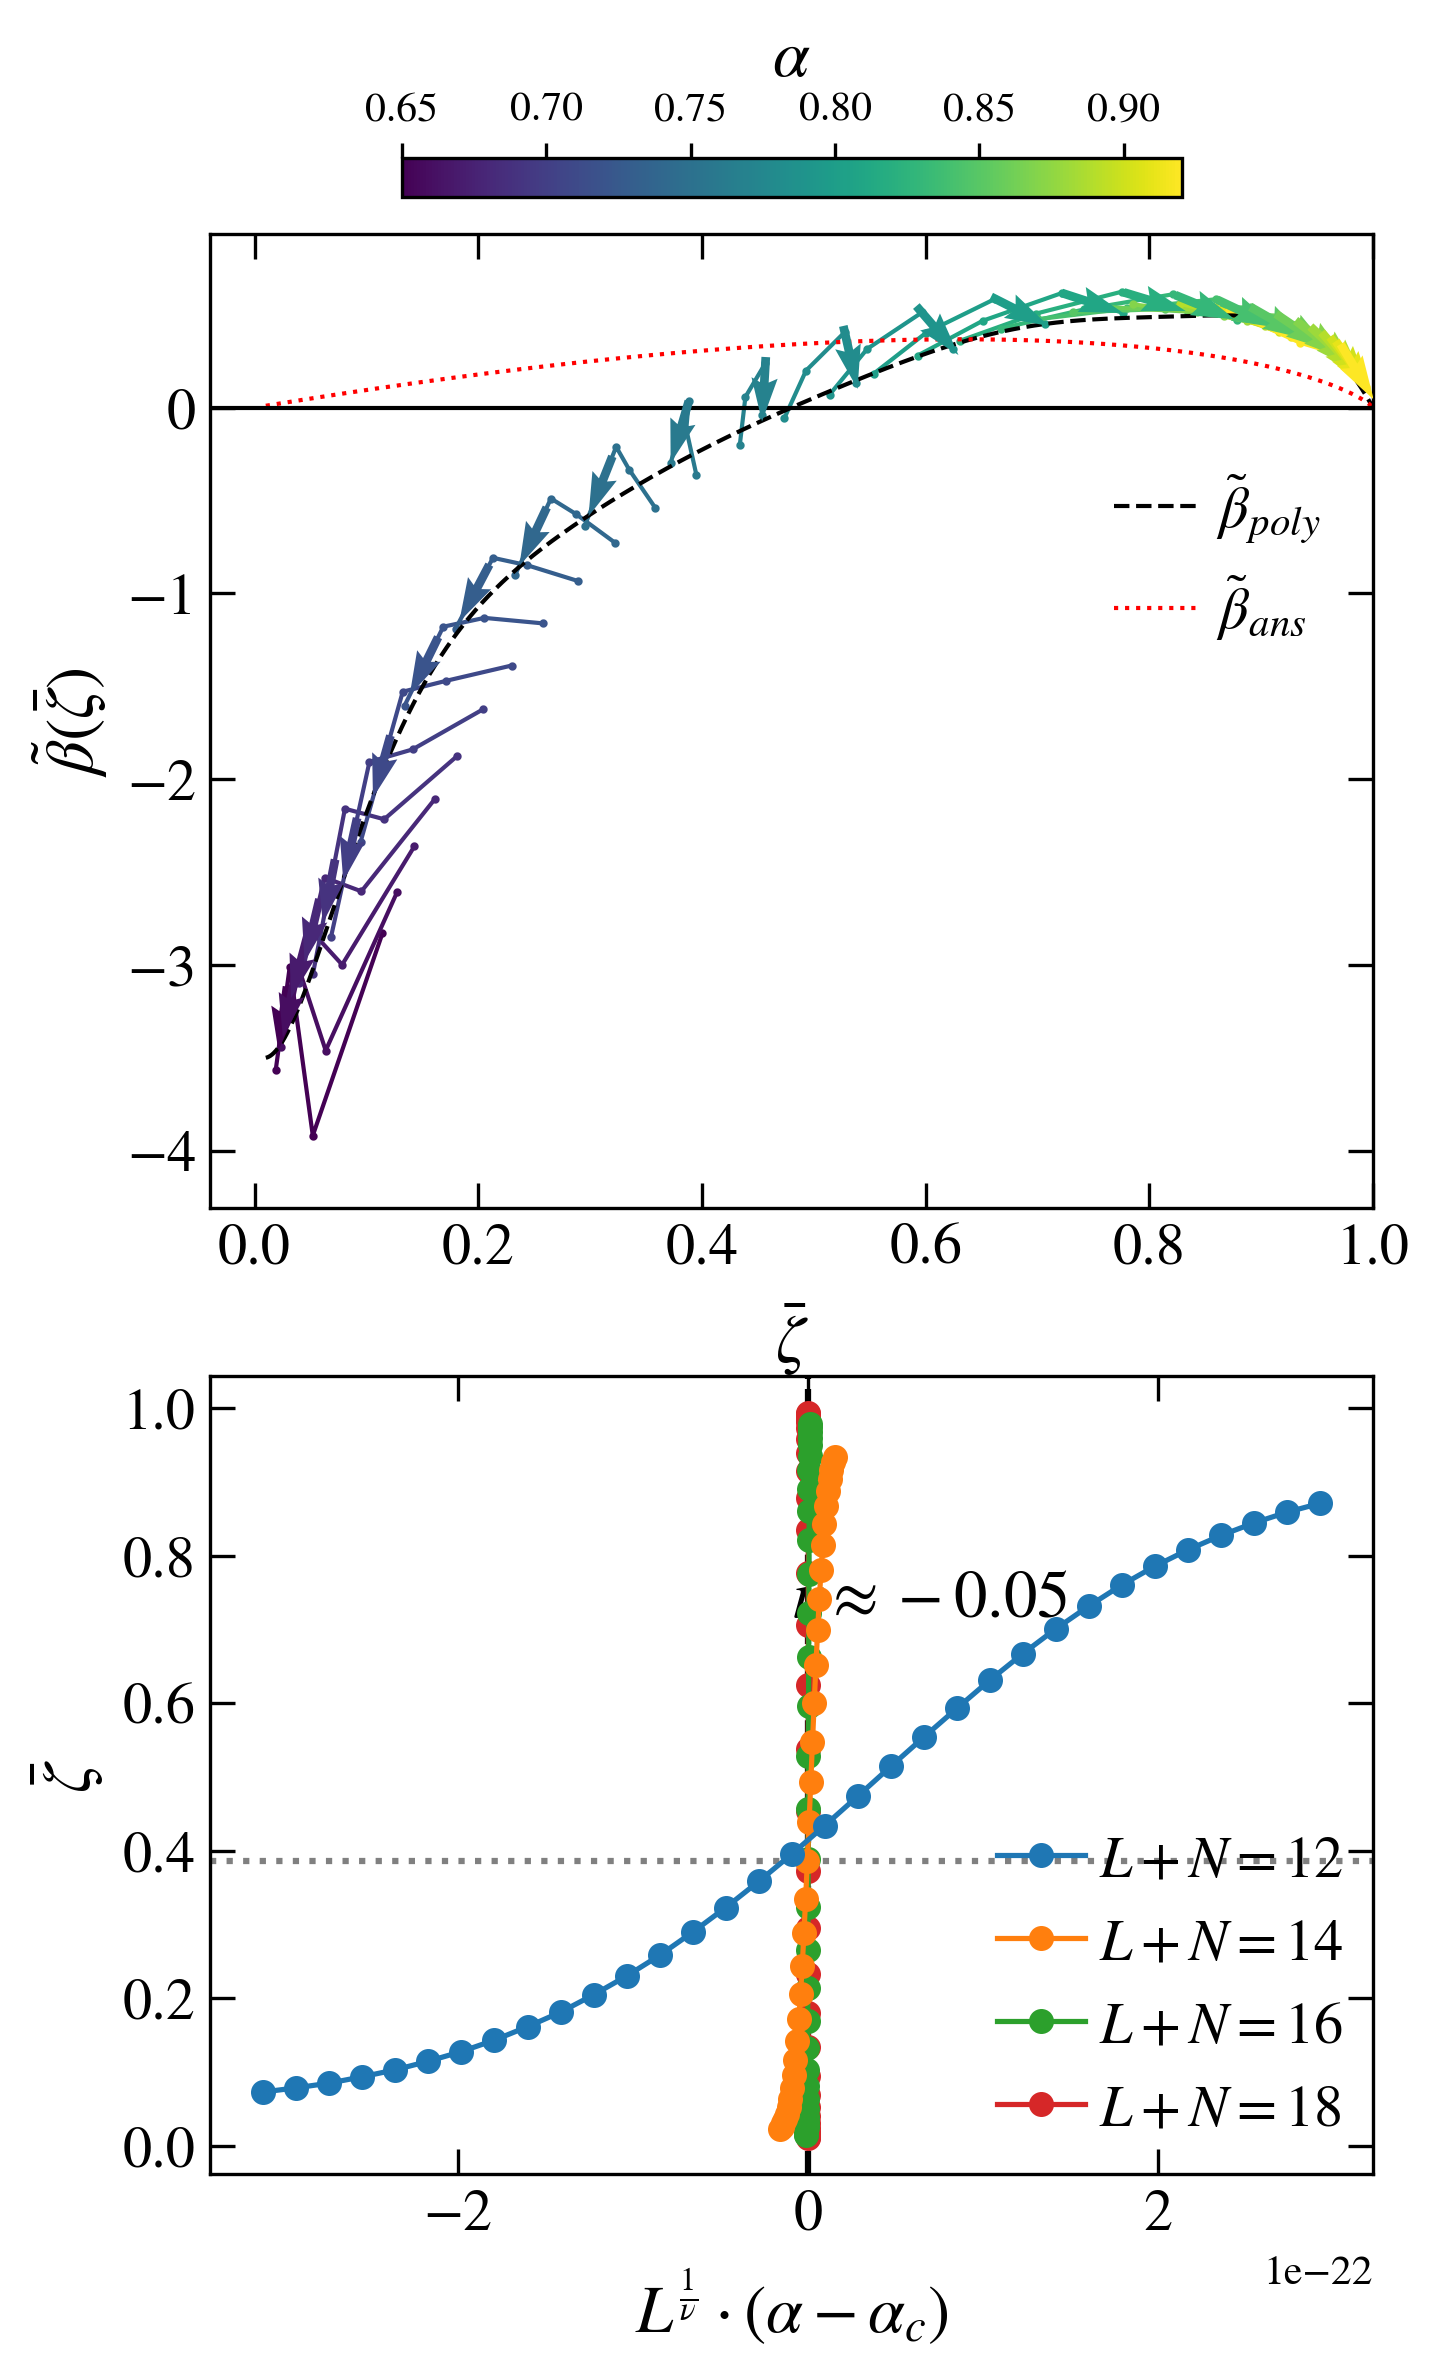

In [37]:
L_total=15
J=0.5
alfa=1.0
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder = 0

eta_erg = 1
alfa_crit = 0.75
if J == 0.5:    alfa_crit = 0.765;  eta_erg = 0.86
elif J == 1:    alfa_crit = 0.74;   eta_erg = 0.80
elif J == 2:    alfa_crit = 0.72;   eta_erg = 0.78
elif J == 3:    alfa_crit = 0.72;   eta_erg = 0.74
else:           alfa_crit = 1/np.sqrt(2)

sub_sizes = np.arange(0, L+1)
fig = plt.figure(figsize=(5,7), dpi = 300)
fig.subplots_adjust(hspace=0.0)
gs = GridSpec(2, 1, height_ratios = [1, 15]) 
gs1 = GridSpec(1,1)
gs.update(top=0.98, bottom=0.48, hspace=0.02)
gs1.update(top=0.4, bottom=0.02)
a = fig.add_subplot(gs[0])
axes = [fig.add_subplot(gs[1]), fig.add_subplot(gs1[0])]
a.axis('off')

# fig, axes = plt.subplots( nrows=2, ncols=1, figsize=(5,9), dpi = 200)

axis = axes[0]

use_inset = 0

interpolate = 0
use_fit = 0
bin_size = 5
use_area_collapse = 1

if use_inset:
    inset = axis.inset_axes([0.46, 0.05, 0.49, 0.46])

def beta0_fun(x, o1 = 0.0, p = 1, c_ = 1):
    # c_ = 2**(2*p) / (2 * p * np.log(2))
    g_ = 1 + o1 / (p * np.log(2))
    if use_area_collapse: 
        # return 5*(g_ - x) / x
        return -(g_ - x) / x * np.log( (g_ - x) / c_ )
    else:                 return (g_ - x) / x 


def pade_fun(x, c1, c2, c3, d1, d2, d3):
    # return c1 * np.arctan(c2 * x - d1)
    return (x**2 + c1*x + c2) / (x**2 + d1 * x + d2)
    # return (x**2 + c1 * x + c2) / (x**2 + d1 * x + d2)

def other_fit(x, c1, c2, c3, c4, c5, c6):
    # return c1 / x**3 + c2 / x**2 + c3 / x**1 + c4
    return c1 / x**3 + c2 / x**2 + c3 / x**1 + c4# + c5/x**4 + c6 / x**5

sizes = np.arange(10, 19, 2)
interaction = []
ydata = []
for L_total in sizes:
    L = L_total - N
    # LA = L_total // 2
    name_out = "Sz_var_last_spin_nu=0.1_L=%g,N=%g.hdf5"%(L, N)

    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            alfa_vals    = np.array(file.get('interaction'))
            occ_dist     = 1-4*(np.array(file.get('occupation distance'))-0.25)

    else:
        print(name_out)

    interaction.append(alfa_vals)
    ydata.append(occ_dist)

alfa_min = 0.65

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(
    vmin=alfa_min,
    vmax=np.max(alfa_vals))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

ydata = np.transpose( np.array(ydata) )

idx_c = 0
# alfa_crit = 1.5

envelope_ydata = []
envelope_xdata = []
yax_max = -10
yax_min = 10
for ii_a, alfa in enumerate(alfa_vals):
    if alfa < alfa_min: continue
    if alfa == alfa_crit: idx_c = ii_a
    # col = 'red' if alfa==alfa_crit else s_m.to_rgba(alfa)
    col = s_m.to_rgba(alfa)
    xx = sizes - N
    yy = ydata[ii_a]

    if interpolate:
        # print(alfa, xx, yy)
        spl = make_spline(xx, yy)
        xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 2)
        yy = spl(xx)
    
    _value_ = np.log(2)
    if use_area_collapse: 
        xx = np.log(xx)
        _value_ = 1.0
    if not use_fit:
        xx_beta = np.zeros( (xx.size - 1) )
        beta = np.zeros( (xx.size - 1) )
        for ii in range(xx.size - 1):
            xx_beta[ii] = yy[ii+1]
            beta[ii] = ( np.log(yy[ii+1]) - np.log(yy[ii])) / ( xx[ii+1] - xx[ii]) / _value_
            # envelope_ydata.append(beta[ii])
            # envelope_xdata.append(xx_beta[ii])
        envelope_ydata.append(beta[-1])
        envelope_xdata.append(xx_beta[-1])
        
        axis.plot(xx_beta, beta, marker='o', markersize=1, lw=1, color=col)
        if use_inset: inset.plot(xx_beta, beta, marker='o', markersize=1, lw=1, color=col)
        if min(beta) < yax_min: yax_min = min(beta)
        if max(beta) > yax_max: yax_max = max(beta)

        i1 = xx_beta.size // 2
        u = xx_beta[i1+1] - xx_beta[i1]
        v = beta[i1+1] - beta[i1]
        pos_x = xx_beta[i1] + u/2
        pos_y = beta[i1] + v/2
        norm = np.sqrt(u**2+v**2) / 5.

        axis.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0)
        if use_inset: inset.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0)
        # xpos = (xx_beta[i1+1] + xx_beta[i1])/2
        # ypos = (beta[i1+1] + beta[i1])/2
        # xdir = xx_beta[i1+1] - xx_beta[i1]
        # ydir = beta[i1+1] - beta[i1]

        # # plot arrow on each line:
        # # for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
        # axis.annotate("", xytext=(xpos,ypos),xy=(xpos+0.001*xdir,ypos+0.001*ydir), 
                        # arrowprops=dict(color=col, facecolor=col,width=0.2,headwidth=2, headlength=1), size = 0.1)
    else:
        my_fit = pade_fun if alfa >= alfa_crit else other_fit
        pars, pconv = fit(my_fit,
                            xdata = xx,
                            ydata = yy,
                            maxfev = 10000)
        dense_sizes = np.linspace(xx[0], xx[-1], 25)
        smooth_data = my_fit(dense_sizes, *pars)
        # spl = make_spline(xx, yy, k=3)
        # xx = np.linspace(xx[0], 2*xx[-1], 100)
        # smooth_data = spl(xx)
        
        deriv = np.gradient( np.log(smooth_data), dense_sizes[1] - dense_sizes[0] ) / _value_

        axis.plot(smooth_data, deriv, lw=1.5, color=col)
        if use_inset: inset.plot(smooth_data, deriv, lw=1.5, color=col)
        if min(deriv) < yax_min: yax_min = min(deriv)
        if max(deriv) > yax_max: yax_max = max(deriv)
        # spline = InterpolateSpline(sizes, ydata[ii_a], k=5, s=0)
        # spl_deriv = spline.derivative(n=1)
        # aaaa = np.linspace(sizes[0], sizes[-1], 100)
        # smooth_data = spline(aaaa)
        # deriv = spl_deriv(aaaa)
        
        envelope_ydata = [*envelope_ydata, deriv[-1]]
        envelope_xdata = [*envelope_xdata, smooth_data[-1]]
        # envelope_ydata = [*envelope_ydata, *deriv]
        # envelope_xdata = [*envelope_xdata, *smooth_data]

        i1 = smooth_data.size // 2
        u = smooth_data[i1+1] - smooth_data[i1]
        v = deriv[i1+1] - deriv[i1]
        pos_x = smooth_data[i1] + u/2
        pos_y = deriv[i1] + v/2
        norm = np.sqrt(u**2+v**2)
    
        axis.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0,
                     width=0.005, headwidth=6)
        u = (smooth_data[i1+1]) - (smooth_data[i1])
        v = deriv[i1+1] - deriv[i1]
        pos_x = smooth_data[i1] + u/2
        pos_y = deriv[i1] + v/2
        norm = np.sqrt(u**2+v**2)
        if use_inset: inset.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0,
                     width=0.02, headwidth=6)

# sorting X and Y data according to increasing X
permut = np.argsort( np.array(envelope_xdata) )
envelope_ydata = np.array(envelope_ydata)[permut]
envelope_xdata = np.array(envelope_xdata)[permut]

size = len(envelope_xdata)
envelope = np.zeros( (size // bin_size) )
xxx = np.zeros( (size // bin_size) )
print("NUm of bins", (size // bin_size))
# print(envelope_xdata, envelope_ydata)
# Finding maximum Y in each bin of 20 points of interpolated data
for k in range(envelope.size):
    idx_r = (k+1) * bin_size if k < envelope.size-1 else -1
    idx = np.argmax(envelope_ydata[k * bin_size : idx_r])
    envelope[k] = envelope_ydata[k * bin_size : idx_r][idx]
    xxx[k]      = envelope_xdata[k * bin_size : idx_r][idx]

xxx = envelope_xdata
envelope = envelope_ydata
# axis[idx1].plot(xxx, envelope, lw=2, color='k', ls='--')

def envelope_polynomial(x, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10):
    return c1 * (x-1) + c2 * (x-1)**2 + c3 * (x-1)**4 + c4 * (x-1)**4 + c5 * (x-1)**5 + c6 * (x-1)**6 + c7 * (x-1)**7 + c8 * (x-1)**8 + c9 * (x-1)**9 + c10 * (x-1)**10

def envelope_ansatz(x, c1):
    return -(1 - x) * np.log(1 - x) + c1 * (1 - x)# + c2 * (1 - x)**2

pars, pconv = fit(envelope_polynomial,
                    xdata = xxx,#[envelope        > -0.25],
                    ydata = envelope)#[envelope   > -0.25])

sp = np.linspace(min(ydata.flatten()), 1, 10000)
axis.plot(sp, envelope_polynomial(sp, *pars), lw=1, color='k', ls='--', label=r"$\tilde{\beta}_{poly}$" if use_area_collapse else r"${\beta}_{poly}$")
if use_inset: inset.plot(sp, envelope_polynomial(sp, *pars), lw=1, color='k', ls='--')

pars2, pconv2 = fit(envelope_ansatz,
                    xdata = xxx,#[envelope        > -0.25],
                    ydata = envelope)#[envelope   > -0.25])

axis.plot(sp, envelope_ansatz(sp, 0), lw=1, color='r', ls=':', label=r"$\tilde{\beta}_{ans}$" if use_area_collapse else r"${\beta}_{ans}$")
if use_inset: inset.plot(sp, envelope_ansatz(sp, 0), lw=1, color='r', ls=':')


envelope = envelope_polynomial(sp, *pars)
Sc_idx = np.argwhere(np.abs(envelope) < 1e-2)[0][0]

def linearize_at_transition(x, a, Sc):
    return a * (x - Sc)
# print(Sc_idx, envelope[Sc_idx - 20 : Sc_idx + 20])
# pars, pconv = fit(linearize_at_transition,
#                     xdata = sp[Sc_idx - 100 : Sc_idx + 100],
#                     ydata = envelope[Sc_idx - 100 : Sc_idx + 100])

# nu_exp = 1. / (pars[0] * pars[1])
# Sc = pars[1]
# print("nu=", nu_exp, 1./nu_exp)
# sp = sp[Sc_idx - 2000 : Sc_idx + 2000]
# axis.plot(sp, linearize_at_transition(sp, *pars), lw=1, color='gray', ls='-')


# nu_exp = 0.5
# Sc = 0.3407
sp = np.linspace(0.7, 1.0)
# axis.plot(sp, 1-sp, ls=':', c='gray')
# inset.plot(sp, 1-sp, ls=':', c='gray', label=r"$\bar{s}_p$")

axis.set_xlim(None, 1.0)
axis.set_ylim(1.1*yax_min, 1.5*yax_max)
# axis.set_ylim(-0.02, 0.06)
# axis.set_xlim(0.5, 1.0)
axis.axhline(y=0, ls='-', c='k', lw=1)

tmp = r"$\bar{s}_A^{L_A=N}$" if J == 1 else r"$X=D_1$"
xlab = r"$\bar{\zeta}$"

# xlab = r"$X=\bar{\phi}$"

ylab = r"$\tilde{\beta}($" + xlab + "$)$" if use_area_collapse else r"${\beta}($" + xlab + "$)$"
fig_help.set_plot_elements(axis, xlabel=xlab, ylabel=ylab, font_size=14, set_legend=False, xscale='linear')
fig_help.set_legend(axis, loc = 'upper right', fontsize=14, anchor=(1.0, 0.81))

if use_inset:
    if J == 0.5: inset.set_xlim(0.62, 1.0)
    if J == 1:   inset.set_xlim(0.72, 1.0)
    if J == 2:   inset.set_xlim(0.91, 1.0)
    if J == 3:   inset.set_xlim(0.94, 1.0)
    # inset.set_xlim(0.6, 1.0)
    inset.set_ylim(-0.2, 1.2*yax_max)
    inset.axhline(y=0, ls='-', c='k', lw=1)
    fig_help.set_plot_elements(inset, xlabel=xlab, ylabel=ylab, font_size=14, set_legend=False)#, xscale='log', yscale='log')
    fig_help.set_legend(inset, loc = 'lower left', fontsize=12)

    inset.xaxis.set_label_position("top")
    inset.xaxis.set_label_coords(.5, 1.2)
    inset.xaxis.tick_top()


# SECOND PLOT
inset = axes[1]
plot_collapsed = 1
ydata = np.transpose( np.array(ydata) )
_Sc = 0
counttt = 0
for ii, L in enumerate(sizes - N):
    if L+N > 10:
        if use_area_collapse: x_collapsed = (L+N)**(1/nu_exp) * (interaction[ii] - alfa_crit)
        else:                 x_collapsed = 2**( (L+N)/nu_exp ) * (interaction[ii] - alfa_crit)
        # y_collapsed = 2**(-(L+N)/nu_exp) * (ydata[ii] - Sc)
        # y_collapsed = (L+N)**(-1/nu_exp) * (ydata[ii] - Sc)
        idx = (np.abs(x_collapsed)).argmin()
        _Sc += ydata[ii][idx]
        counttt += 1
        if plot_collapsed: 
            inset.plot(x_collapsed, ydata[ii], marker='o', markersize=5, lw=1.25, label=r"$L+N=%d$"%(L+N),     zorder=20 - L)
            # inset.plot(interaction[ii], y_collapsed, marker='o', markersize=2, lw=0.75, label=r"$L+N=%d$"%(L+N),     zorder=20 - L)
        else:
            inset.plot(interaction[ii], ydata[ii], marker='o', markersize=5, lw=1.25, label=r"$L+N=%d$"%(L+N), zorder=20 - L)

inset.axvline(x=0 if plot_collapsed else alfa_crit, ls='--', c='k')
_Sc = _Sc / counttt
print(_Sc)
# axis.plot(xxx, _Sc / nu_exp * (xxx - _Sc), lw=1, color='blue', ls='-')

inset.axhline(y=_Sc, ls=':', c='gray')

xlabbb = r"${L}^{\frac{1}{\nu}}\cdot(\alpha-\alpha_c)$" if use_area_collapse else r"$\mathcal{D}^{\frac{1}{\nu}}\cdot(\alpha-\alpha_c)$"
fig_help.set_plot_elements(inset, ylabel=xlab, xlabel=xlabbb if plot_collapsed else r"$\alpha$", font_size=14, set_legend=False)#, ylim=(0,1))
# fig_help.set_plot_elements(inset, ylabel=xlab, xlabel=r"$(L+N)^{\frac{1}{\nu}}\cdot(\alpha-\alpha_c)$" if plot_collapsed else r"$\alpha$", font_size=14, set_legend=False)#, ylim=(0,1))
# fig_help.set_plot_elements(inset, ylabel=r"$(L+N)^{-\frac{1}{\nu}}\cdot(\bar{s}_1-s_1^c)$" if plot_collapsed else xlab, xlabel=r"$\alpha$", font_size=10, set_legend=False)#, ylim=(0,1))
fig_help.set_legend(inset, loc = 'lower right', fontsize=14)

cbar = fig.colorbar(s_m, ax=a, location='top', fraction = 0.6)
cbar.set_label(r"$\alpha$", fontsize=16)


fig.subplots_adjust(wspace = 0.25, hspace=0.25)


axes[1].annotate(r"$\nu\approx%.2f$"%nu_exp, fontsize=16, xy=(0.5, 0.7), xycoords='axes fraction')

# axes[0].annotate("(a)", fontsize=16, xy=(0.03, 0.9), xycoords='axes fraction')
# axes[1].annotate("(b)", fontsize=16, xy=(0.9, 0.05), xycoords='axes fraction')



# higher order polynomial for beta fitting
# test ansatz for beta tilde at s_p=1x